In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
!pip install nnUNetv2

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


- Preprocessing datasets

In [ ]:
from PIL import Image
import os

def convert_jpg_to_tiff(input_directory, output_directory=None):
    if output_directory is None:
        output_directory = input_directory

    os.makedirs(output_directory, exist_ok=True)

    for filename in os.listdir(input_directory):
        if filename.lower().endswith(".jpg") or filename.lower().endswith(".jpeg"):
            jpg_path = os.path.join(input_directory, filename)
            with Image.open(jpg_path) as img:
                tiff_filename = f"{os.path.splitext(filename)[0]}.tiff"
                tiff_path = os.path.join(output_directory, tiff_filename)

                img.save(tiff_path, "TIFF")
                print(f"Converted: {jpg_path} to {tiff_path}")

input_directory = '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_raw/Dataset555_BloodCellSeg/imagesTr/'

convert_jpg_to_tiff(input_directory)

In [ ]:
import os
from PIL import Image

def convert_tiff_to_png(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.tiff'):
            # Create the new filename with .png extension
            new_filename = filename.replace('.tiff', '.png')

            # Create the full paths for the old and new filenames
            old_file = os.path.join(directory, filename)
            new_file = os.path.join(directory, new_filename)

            # Open the TIFF file and convert it to PNG
            with Image.open(old_file) as img:
                img.save(new_file, 'PNG')

            # Optionally remove the old TIFF file
            os.remove(old_file)

            print(f"Converted: {old_file} to {new_file}")

# Define the directory path
directory_path = '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_raw/Dataset555_BloodCellSeg/imagesTr/'

# Call the function to convert TIFF files to PNG
convert_tiff_to_png(directory_path)


In [ ]:
import os
from PIL import Image

def convert_rgba_to_rgb(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.png'):
            # Create the full path for the file
            file_path = os.path.join(directory, filename)

            # Open the PNG file and convert it to RGB
            with Image.open(file_path) as img:
                # Check if the image has an alpha channel
                if img.mode == 'RGBA':
                    rgb_img = img.convert('RGB')  # Convert to RGB mode
                    rgb_img.save(file_path)  # Save the converted image back to the same path
                    print(f"Converted: {file_path} to RGB")
                else:
                    print(f"No conversion needed: {file_path}")

# Define the directory path
directory_path = '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_raw/Dataset555_BloodCellSeg/imagesTs-External/'

# Call the function to convert RGBA PNG files to RGB
convert_rgba_to_rgb(directory_path)


In [ ]:
import os

def rename_files_in_directory(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.tiff'):
            # Split the filename into name and extension
            name, ext = os.path.splitext(filename)

            # Skip if the file already has _0000 before .tiff
            if name.endswith('_0000'):
                continue

            # Add _0000 before the file extension
            new_name = f"{name}_0000{ext}"

            # Create the full paths for the old and new filenames
            old_file = os.path.join(directory, filename)
            new_file = os.path.join(directory, new_name)

            # Rename the file
            os.rename(old_file, new_file)
            print(f"Renamed: {old_file} to {new_file}")

# Define the directory path
directory_path = '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_raw/Dataset555_BloodCellSeg/imagesTr/'

# Call the function to rename files
rename_files_in_directory(directory_path)

- Generate json file for training

In [ ]:
from nnunetv2.dataset_conversion.generate_dataset_json import generate_dataset_json
from os.path import join

output_folder = '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_raw/Dataset555_BloodCellSeg'
num_training_cases = 231

generate_dataset_json(
    output_folder,
    {0: 'R', 1: 'G', 2: 'B'},
    {'background': 0, 'cytoplasm': 1, 'nucleus': 2},
    num_training_cases,
    '.png',
    dataset_name="Dataset555_BloodCellSeg"
)

- Set environment variables

In [ ]:
import os

os.environ['nnUNet_raw'] = '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_raw/'
os.environ['nnUNet_preprocessed'] = '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_preprocessed'
os.environ['nnUNet_results'] = '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_results'

- Verify dataset integerity (file names are converted to match the requirements beforehand)
- Task name is set to 555
- Config is 2d
- RGBA is converted to RGB

In [ ]:
!nnUNetv2_plan_and_preprocess -d 555 -c 2d --verify_dataset_integrity

Fingerprint extraction...
Dataset555_BloodCellSeg
Using <class 'nnunetv2.imageio.natural_image_reader_writer.NaturalImage2DIO'> as reader/writer

####################
verify_dataset_integrity Done. 
If you didn't see any error messages then your dataset is most likely OK!
####################

Experiment planning...

############################
INFO: You are using the old nnU-Net default planner. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

2D U-Net configuration:
{'data_identifier': 'nnUNetPlans_2d', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 9, 'patch_size': (448, 448), 'median_image_size_in_voxels': array([400., 400.]), 'spacing': array([1., 1.]), 'normalization_schemes': ['ZScoreNormalization', 'ZScoreNormalization', 'ZScoreNormalization'], 'use_mask_for_norm': [False, False, False], 'resampling_fn_data': 'resample

- Train the model using 5 folds

In [ ]:

!nnUNetv2_train 555 "2d" 2



############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2024-08-01 16:17:44.429427: do_dummy_2d_data_aug: False
2024-08-01 16:17:44.438373: Using splits from existing split file: /content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_preprocessed/Dataset555_BloodCellSeg/splits_final.json
2024-08-01 16:17:45.208802: The split file contains 5 splits.
202

- Due to the limitation of my gpu, checkpoint files are set instead of running until the convergence. (the model is overfitted after about 15 epochs)

In [ ]:
import os
import shutil

base_directory = '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_results/Dataset555_BloodCellSeg/nnUNetTrainer__nnUNetPlans__2d'

for fold in range(5):
    fold_directory = os.path.join(base_directory, f'fold_{fold}')
    source_file = os.path.join(fold_directory, 'checkpoint_best.pth')
    destination_file = os.path.join(fold_directory, 'checkpoint_final.pth')

    if os.path.exists(source_file):
        shutil.copyfile(source_file, destination_file)
        print(f'Copied and renamed {source_file} to {destination_file}')
    else:
        print(f'Source file {source_file} does not exist.')

print("All done!")

Copied and renamed /content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_results/Dataset555_BloodCellSeg/nnUNetTrainer__nnUNetPlans__2d/fold_0/checkpoint_best.pth to /content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_results/Dataset555_BloodCellSeg/nnUNetTrainer__nnUNetPlans__2d/fold_0/checkpoint_final.pth
Copied and renamed /content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_results/Dataset555_BloodCellSeg/nnUNetTrainer__nnUNetPlans__2d/fold_1/checkpoint_best.pth to /content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_results/Dataset555_BloodCellSeg/nnUNetTrainer__nnUNetPlans__2d/fold_1/checkpoint_final.pth
Copied and renamed /content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_results/Dataset555_BloodCellSeg/nnUNetTrainer__nnUNetPlans__2d/fold_2/checkpoint_best.pth to /content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_results/Dataset555_BloodCellSeg/nnUNetTrainer__nnUNetPlans__2d/fold_2/checkpoint_final.pth
Copied and renamed /content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_r

- Test Internal cases

In [ ]:
!nnUNetv2_predict -i '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_raw/Dataset555_BloodCellSeg/imagesTs-Internal' -o '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_results/Dataset555_BloodCellSeg/nnuNetTests/imagesTs-Internal' -d 555 -c "2d" --save_probabilities


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 77 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 77 cases that I would like to predict

Predicting img_000:
perform_everything_on_device: True
100% 1/1 [00:01<00:00,  1.41s/it]
100% 1/1 [00:00<00:00, 24.92it/s]
100% 1/1 [00:00<00:00, 24.97it/s]
100% 1/1 [00:00<00:00, 25.54it/s]
100% 1/1 [00:00<00:00, 26.08it/s]
sending off prediction to background worker for resampling and export
done with img_000

Predicting img_001:
perform_everything_on_device: True
100% 1/1 [00:00<00:00, 26.62it/s]
100% 1/1 [00:00<00:00, 26.42it/s

- Prediction outputs

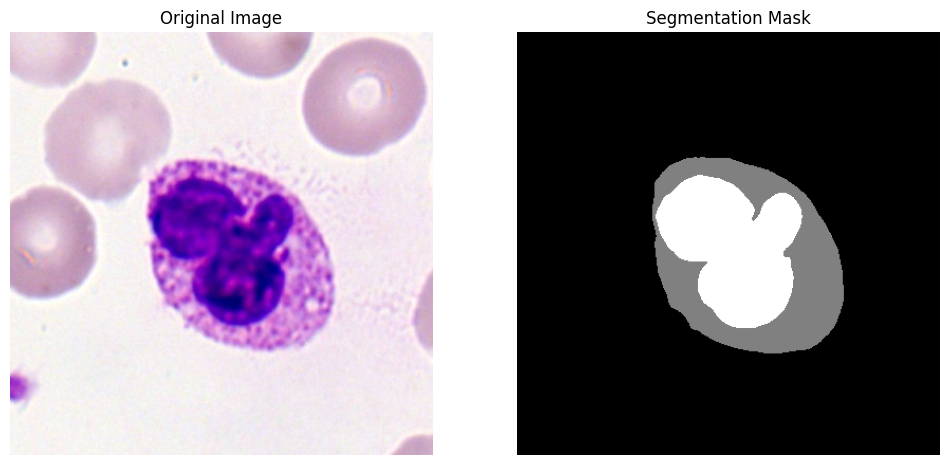

In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import os

def inspect_segmentation_mask(mask_path, input_path):
    image_name = os.path.basename(mask_path)

    original_image_path = input_path
    original_image = io.imread(original_image_path)
    mask = io.imread(mask_path)
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].imshow(original_image, cmap='gray')
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title('Segmentation Mask')
    ax[1].axis('off')

    plt.show()

mask_path = '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_results/Dataset555_BloodCellSeg/nnuNetTests/imagesTs-Internal/img_002.png'
input_path = '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_raw/Dataset555_BloodCellSeg/imagesTs-Internal/img_002_0000.png'
inspect_segmentation_mask(mask_path, input_path)


- Test External cases

In [ ]:
!nnUNetv2_predict -i '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_raw/Dataset555_BloodCellSeg/imagesTs-External' -o '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_results/Dataset555_BloodCellSeg/nnuNetTests/imagesTs-External' -d 555 -c "2d" --save_probabilities


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 60 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 60 cases that I would like to predict

Predicting img_000:
perform_everything_on_device: True
100% 1/1 [00:01<00:00,  1.13s/it]
100% 1/1 [00:00<00:00, 30.07it/s]
100% 1/1 [00:00<00:00, 28.63it/s]
100% 1/1 [00:00<00:00, 29.11it/s]
100% 1/1 [00:00<00:00, 28.81it/s]
sending off prediction to background worker for resampling and export
done with img_000

Predicting img_001:
perform_everything_on_device: True
100% 1/1 [00:00<00:00, 24.94it/s]
100% 1/1 [00:00<00:00, 27.57it/s

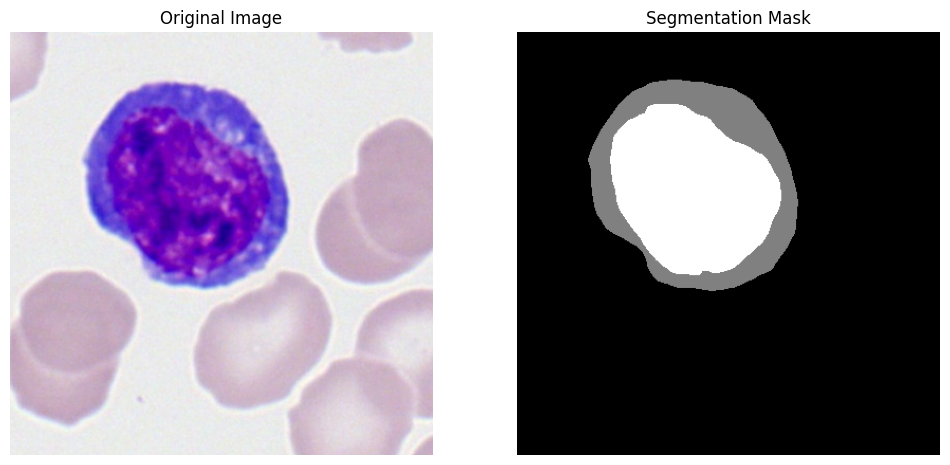

In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import os

def inspect_segmentation_mask(mask_path, input_path):
    image_name = os.path.basename(mask_path)

    original_image_path = input_path
    original_image = io.imread(original_image_path)
    mask = io.imread(mask_path)
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].imshow(original_image, cmap='gray')
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title('Segmentation Mask')
    ax[1].axis('off')

    plt.show()

mask_path = '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_results/Dataset555_BloodCellSeg/nnuNetTests/imagesTs-External/img_006.png'
input_path = '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_raw/Dataset555_BloodCellSeg/imagesTs-External/img_006_0000.png'
inspect_segmentation_mask(mask_path, input_path)


- Evaluation

In [ ]:
!nnUNetv2_predict -i '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_raw/Dataset555_BloodCellSeg/imagesTr' -o '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_results/Dataset555_BloodCellSeg/nnuNetTests/imagesTr' -d 555 -c "2d" --save_probabilities


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 231 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 231 cases that I would like to predict

Predicting img_000:
perform_everything_on_device: True
100% 1/1 [00:01<00:00,  1.11s/it]
100% 1/1 [00:00<00:00, 30.53it/s]
100% 1/1 [00:00<00:00, 31.54it/s]
100% 1/1 [00:00<00:00, 29.72it/s]
100% 1/1 [00:00<00:00, 30.63it/s]
sending off prediction to background worker for resampling and export
done with img_000

Predicting img_001:
perform_everything_on_device: True
100% 1/1 [00:00<00:00, 26.29it/s]
100% 1/1 [00:00<00:00, 24.81it

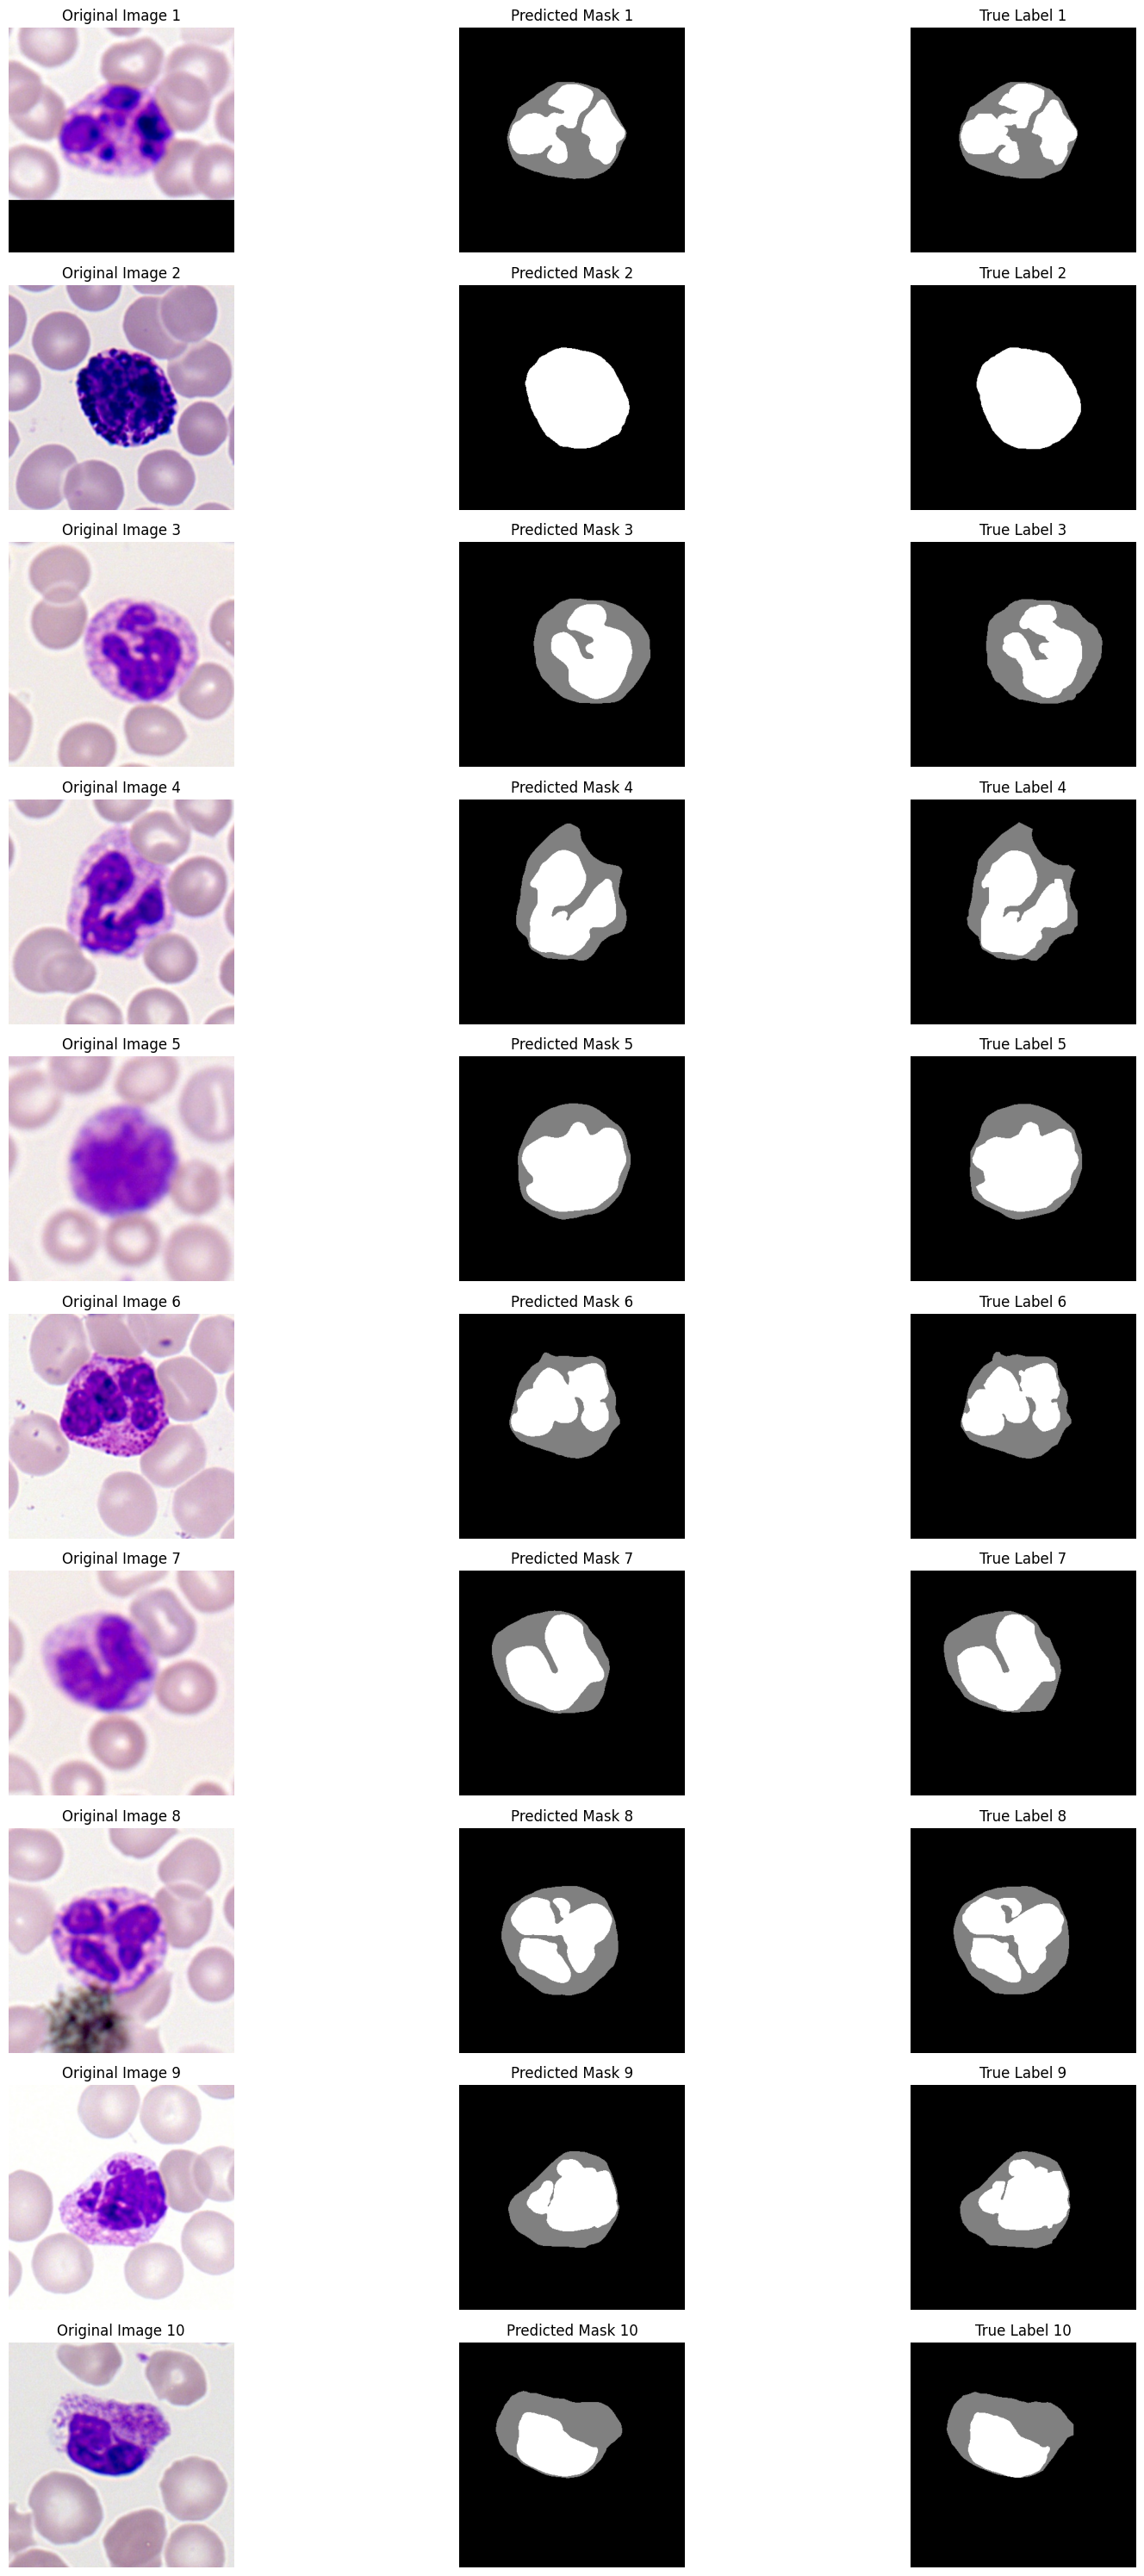

In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import os

def inspect_segmentation_masks(predicted_mask_paths, true_label_paths, input_paths):
    num_images = len(predicted_mask_paths)
    assert num_images == len(input_paths) == len(true_label_paths), "The number of paths must be the same for predicted masks, true labels, and input images"

    cols = 3
    rows = num_images

    fig, ax = plt.subplots(rows, cols, figsize=(18, rows * 3))

    for i in range(num_images):
        original_image = io.imread(input_paths[i])
        predicted_mask = io.imread(predicted_mask_paths[i])
        true_label = io.imread(true_label_paths[i])

        ax[i, 0].imshow(original_image, cmap='gray')
        ax[i, 0].set_title(f'Original Image {i+1}')
        ax[i, 0].axis('off')

        ax[i, 1].imshow(predicted_mask, cmap='gray')
        ax[i, 1].set_title(f'Predicted Mask {i+1}')
        ax[i, 1].axis('off')

        ax[i, 2].imshow(true_label, cmap='gray')
        ax[i, 2].set_title(f'True Label {i+1}')
        ax[i, 2].axis('off')

    plt.tight_layout()
    plt.show()

predicted_mask_folder = '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_results/Dataset555_BloodCellSeg/nnuNetTests/imagesTr'
true_label_folder = '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_raw/Dataset555_BloodCellSeg/labelsTr'
input_folder = '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_raw/Dataset555_BloodCellSeg/imagesTr'

predicted_mask_files = [
    'img_000.png', 'img_001.png', 'img_002.png', 'img_003.png', 'img_004.png',
    'img_005.png', 'img_006.png', 'img_007.png', 'img_008.png', 'img_009.png'
]
true_label_files = [
    'img_000.png', 'img_001.png', 'img_002.png', 'img_003.png', 'img_004.png',
    'img_005.png', 'img_006.png', 'img_007.png', 'img_008.png', 'img_009.png'
]
input_files = [
    'img_000_0000.png', 'img_001_0000.png', 'img_002_0000.png', 'img_003_0000.png', 'img_004_0000.png',
    'img_005_0000.png', 'img_006_0000.png', 'img_007_0000.png', 'img_008_0000.png', 'img_009_0000.png'
]

predicted_mask_paths = [os.path.join(predicted_mask_folder, file) for file in predicted_mask_files]
true_label_paths = [os.path.join(true_label_folder, file) for file in true_label_files]
input_paths = [os.path.join(input_folder, file) for file in input_files]

inspect_segmentation_masks(predicted_mask_paths, true_label_paths, input_paths)


In [ ]:
predicted_mask_files = '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_results/Dataset555_BloodCellSeg/nnuNetTests/imagesTr/img_010.png'
true_label_files = '/content/drive/My Drive/MLQuiz-WangLab/nnUNet/nnUNet_raw/Dataset555_BloodCellSeg/labelsTr/img_010.png'

!pip install medpy
from medpy import metric
from skimage import io

label_seg = io.imread(predicted_mask_files)
label_gt = io.imread(true_label_files)
whole_cell_dc = metric.binary.dc(label_seg>0, label_gt>0)
nucleus_dc = metric.binary.dc(label_seg==2, label_gt==2)

print(nucleus_dc)

0.9889538661468485
